# Business Understanding

 Sprint, one of the biggest telecom companies in the USA are keen on figuring out how many customers might decide to leave them in the coming months. Luckily, they've got a bunch of past data about when customers have left before, as well as info about who these customers are, what they've bought, and other things like that. 

They want to better understand their clients and especially so the ones who churn. Since customers are the company's income, loss of customer's infers a loss of income. They would therefore like to have a chance of earlier preparation for churning customers in future. A machine learning model would help mitigate this issue.

# Data Understanding

The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

# Objectives

1. Analyse data to find insightful information about the customers of Sprint.
2. Build a machine learning model to predict the customers who are likely to churn.

# Importing Libraries and Loading Data


In [297]:
# Importing libraries
import numpy as np
from itertools import permutations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

In [173]:
# Setting max display of columns in a pandas dataframe
pd.set_option('display.max_columns', None)

# Setting the plot style to use
plt.style.use('ggplot')

In [174]:
# Loading data
df = pd.read_csv(r"C:\Users\nick\OneDrive\Desktop\Code\Teleco_customer_churn_prediction\Data\TelcoCustomerChurnData.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [175]:
# Use skimpy to get an overview of the data
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 21     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ SeniorCitizen         │    0 │       0 │   0.16 │   0.37 │    0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ tenure                │    0 │       0 │     32 │     25 │    0 │     9 │    29 │    55 │     72 │ ▇▅▃▃▃▆  │  │
│ │ MonthlyCharges        │    0 │       0 │     65 │     30 │   18 │    36 │    70 │    90 │    120 │ ▇▃▃▇▇▃  │  │
│ └───────────────────────┴──────┴─────────┴────────┴────────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  7043 │  │
│ │ gender                           │      0 │         0 │                          1 │                  7043 │  │
│ │ Partner                          │      0 │         0 │                          1 │                  7043 │  │
│ │ Dependents                       │      0 │         0 │                          1 │                  7043 │  │
│ │ PhoneService                     │      0 │         0 │                          1 │                  7043 │  │
│ │ MultipleLines                    │      0 │         0 │                        1.2 │                  8407 │  │
│ │ InternetService                  │      0 │         0 │                        1.4 │                 10139 │  │
│ │ OnlineSecurity                   │      0 │         0 │                        1.4 │                 10095 │  │
│ │ OnlineBackup                     │      0 │         0 │                        1.4 │                 10095 │  │
│ │ DeviceProtection                 │      0 │         0 │                        1.4 │                 10095 │  │
│ │ TechSupport                      │      0 │         0 │                        1.4 │                 10095 │  │
│ │ StreamingTV                      │      0 │         0 │                        1.4 │                 10095 │  │
│ │ StreamingMovies                  │      0 │         0 │                        1.4 │                 10095 │  │
│ │ Contract                         │      0 │         

Total charges shouldn't be a string type, also SeniorCitizen shouldn't be numeric type.

In [176]:
# Correcting the columns with wrong datatypes
category_cols = ['SeniorCitizen', 'gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'Partner', 'PhoneService', 
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                 'PaperlessBilling', 'Churn', 'Dependents']

df[category_cols] = df[category_cols].astype('category')

# Replacing empty strings with 0 in total charges to convert to int
df['TotalCharges'].replace({' ': '0'}, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [177]:
# Checking for null values (Completeness)
df.isna().sum().sum()

0

There are no missing values in the data, the data is complete.

In [178]:
# Checking number of unique customer IDs equal number of records
assert df['customerID'].nunique() == df.shape[0]

There are no duplicates in the data and all records represent different customers

In [179]:
# Data Consistency check
df[category_cols].apply(lambda col: print(f'{str(col.name)}: {list(col.unique())}\n Number of categories: {len(list(col.unique()))}, \n'))

SeniorCitizen: [0, 1]
 Number of categories: 2, 

gender: ['Female', 'Male']
 Number of categories: 2, 

MultipleLines: ['No phone service', 'No', 'Yes']
 Number of categories: 3, 

InternetService: ['DSL', 'Fiber optic', 'No']
 Number of categories: 3, 

Contract: ['Month-to-month', 'One year', 'Two year']
 Number of categories: 3, 

PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
 Number of categories: 4, 

Partner: ['Yes', 'No']
 Number of categories: 2, 

PhoneService: ['No', 'Yes']
 Number of categories: 2, 

OnlineSecurity: ['No', 'Yes', 'No internet service']
 Number of categories: 3, 

OnlineBackup: ['Yes', 'No', 'No internet service']
 Number of categories: 3, 

DeviceProtection: ['No', 'Yes', 'No internet service']
 Number of categories: 3, 

TechSupport: ['No', 'Yes', 'No internet service']
 Number of categories: 3, 

StreamingTV: ['No', 'Yes', 'No internet service']
 Number of categories: 3, 

StreamingMovies: ['No

SeniorCitizen       None
gender              None
MultipleLines       None
InternetService     None
Contract            None
PaymentMethod       None
Partner             None
PhoneService        None
OnlineSecurity      None
OnlineBackup        None
DeviceProtection    None
TechSupport         None
StreamingTV         None
StreamingMovies     None
PaperlessBilling    None
Churn               None
Dependents          None
dtype: object

Some columns have a 'No' category and other negative categories like 'No internet service' or 'No phone service'. I will replace all other negative options with 'No' for uniformity.

In [180]:
# Replacing inconsistent values to ensure data consistency
df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)

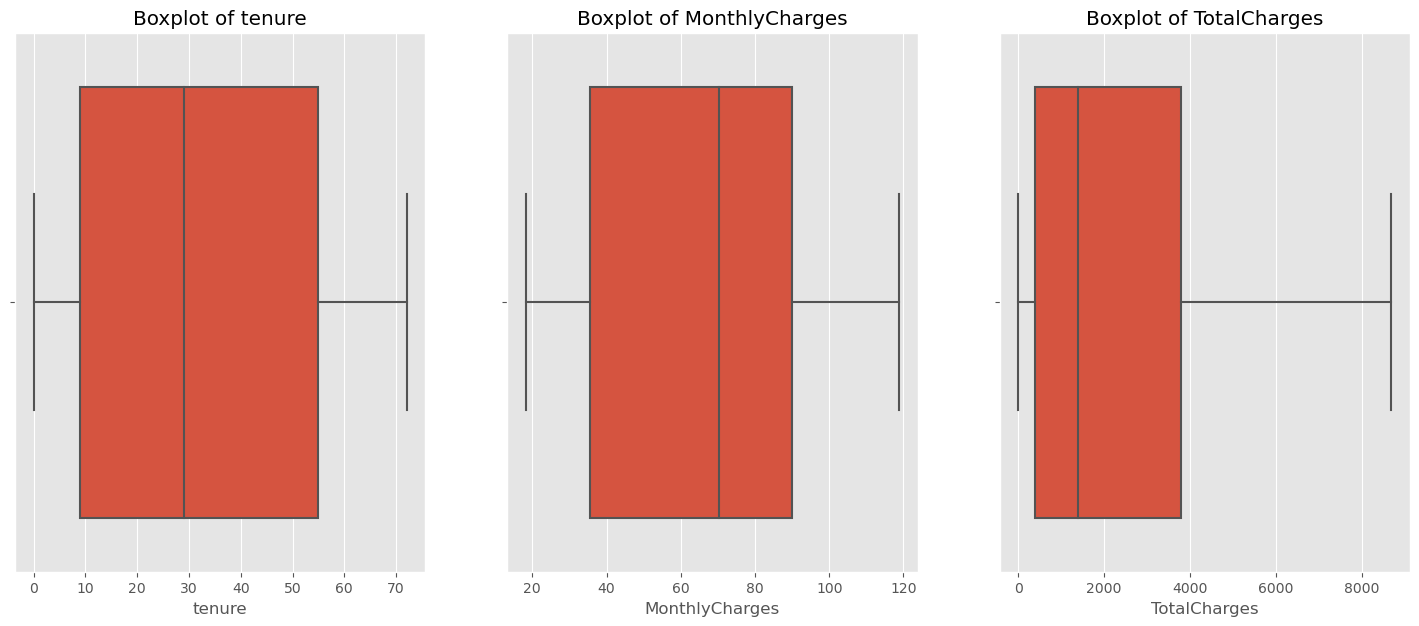

In [181]:
# Outliers check for numeric values
numeric_df = df.select_dtypes(include=['int', 'float'])  # Numeric columns dataframe

# Plotting boxpots for the numeric columns in the data
fig, ax = plt.subplots(figsize=(18, 7), ncols=3)
axis = 0

# Looping through the axis for plotting
for column in numeric_df.columns:
    sns.boxplot(numeric_df, x=column, ax=ax[axis], saturation=0.85)
    ax[axis].set_title(f"Boxplot of {column}")
    axis += 1

plt.show()


There are no outliers in the numeric columns of the dataset. 

Data cleaning and quality checking is complete. I will extract the data incase I'd like to use it elsewhere.

In [182]:
# Extracting cleaned data
df.to_csv(r"C:\Users\nick\OneDrive\Desktop\Code\Teleco_customer_churn_prediction\Data\CleanData.csv")

# EDA

In [183]:
# Function that plots bargraphs for univariate and multivariate analysis
def barPlotter(data, x_label, hue_label=None):
    """Simple function to plot countplots either when doing a univariate analysis on a column or bivarate analysis on multiple columns"""
    
    if hue_label == None:
        plt.figure(figsize=(8,6))
        plot = sns.countplot(data=data, x=x_label, hue=hue_label)
        plt.bar_label(plot.containers[0])
        plt.title(f"Barplot of classes in {x_label.title()}")

    else: 
        plt.figure(figsize=(8,6))
        plot = sns.countplot(data=data, x=x_label, hue=hue_label)
        plt.title(f"{hue_label}: Based on {x_label}")

    plt.show()

## What is the churn rate of customers in Sprint?

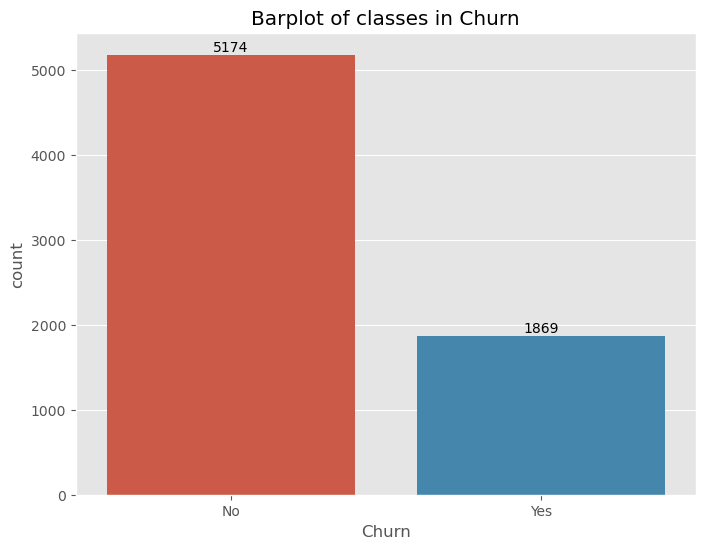

In [184]:
# Barplot of churn
barPlotter(df, 'Churn')

There is a ~27% churn rate of customers in the company. 

This class imbalance can prove problematic when building the machine learning models as it will introduce bias to the model.

## What is the gender distribution of the customers?

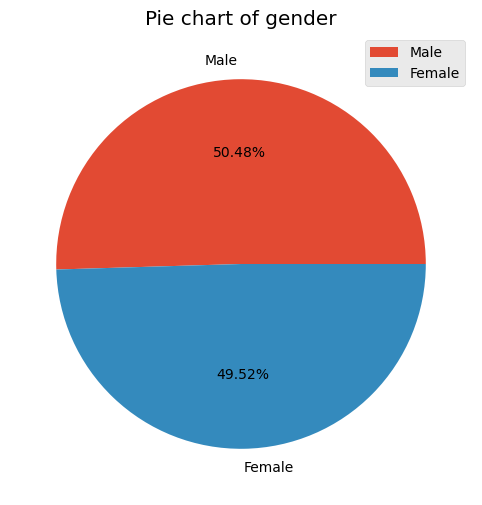

In [185]:
# Plotting a piechart for gender
plt.figure(figsize=(10, 6))
plt.pie(data=df['gender'].value_counts().reset_index(), x='count', labels=['Male', 'Female'],  autopct='%.2f%%')
plt.title("Pie chart of gender")
plt.legend()
plt.show()

There is not much of a difference in the composition of male and female customers. 

## Does gender have an impact on customer churn?

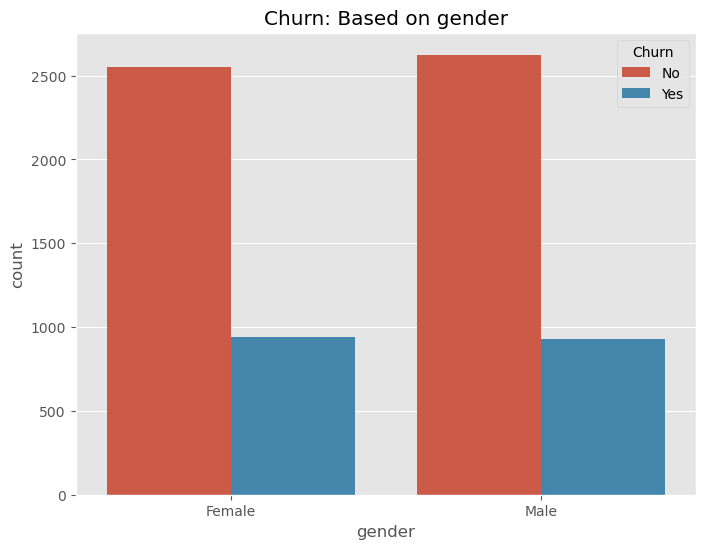

In [186]:
# Plotting churn based on gender
barPlotter(df, 'gender', 'Churn')

It would seem that gender has no inluence whatsoever on whether a customer would churn or not.

## What is the age (SeniorCitizen) distribution of the customers?

Senior citizen is an age column that indicates whether a customer is a senior citizen or not.


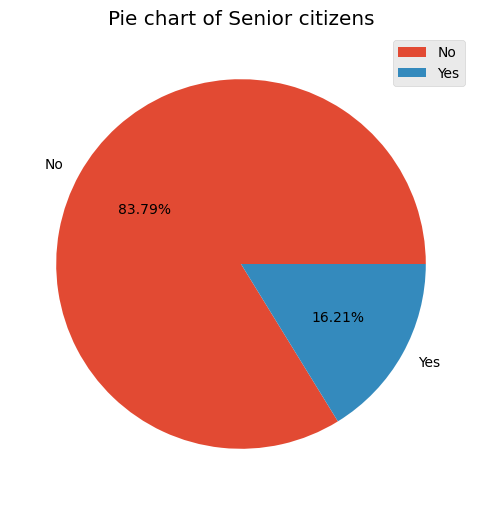

In [187]:
# Plotting a piechart for SeniorCitizen
plt.figure(figsize=(10, 6))
plt.pie(data=df['SeniorCitizen'].value_counts().reset_index(), x='count', labels=['No', 'Yes'], autopct='%.2f%%')
plt.title("Pie chart of Senior citizens")
plt.legend()
plt.show()

A majority of the Sprint's customers are not senior citizens (Young People).

## What is the churn rate based on the age of a customer?

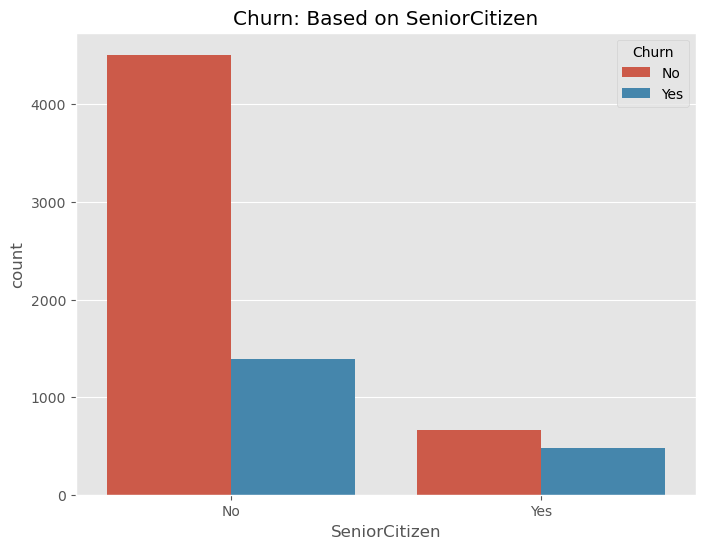

In [188]:
# Renaming the column categories in Senior citizen to No and Yes for readability
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)

# Plotting churn based on senior citizen status
barPlotter(df, 'SeniorCitizen', 'Churn')

From the plot above, Senior citizens are less likely to leave the company as compared to non-senior individuals.

## What is the tenure distribution for Sprint's customers?

`To Note:` Tenure is in months not in years.

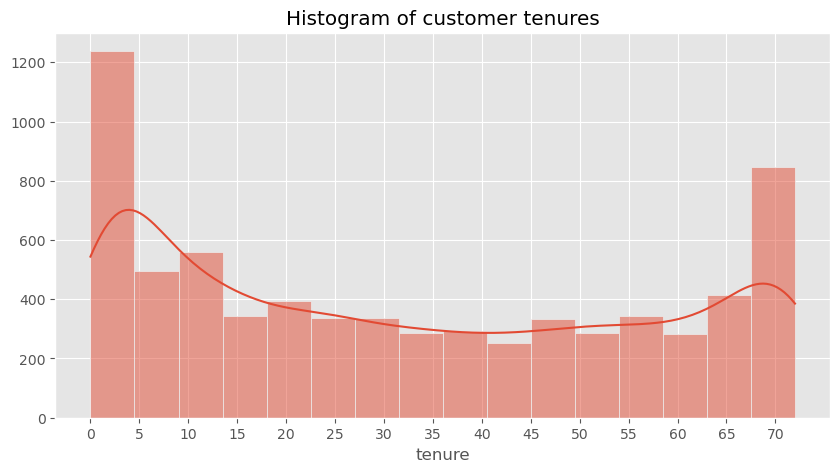

In [189]:
# Plotting histogram for tenure
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', kde=True)
plt.xticks(ticks=range(0, 75, 5))
plt.ylabel("")
plt.title("Histogram of customer tenures")
plt.show()

There are a lot of 'young' customers which is to be expected. To note is the high number of customers who have been loyal to Sprint. 

Segmenting the tenure column into 3 classes (A new column called `Loyalty`) could be more useful as the customers can be clearly distinguished based on their loyalty. I can then do away with the tenure column.

## Does Loyalty affect churning of customers?

Loyaltly is an engineered column from tenure.

In [190]:
# Engineering loyalty column
df['loyalty'] = pd.cut(x=df['tenure'], bins=3, labels=['low', 'medium', 'high'])

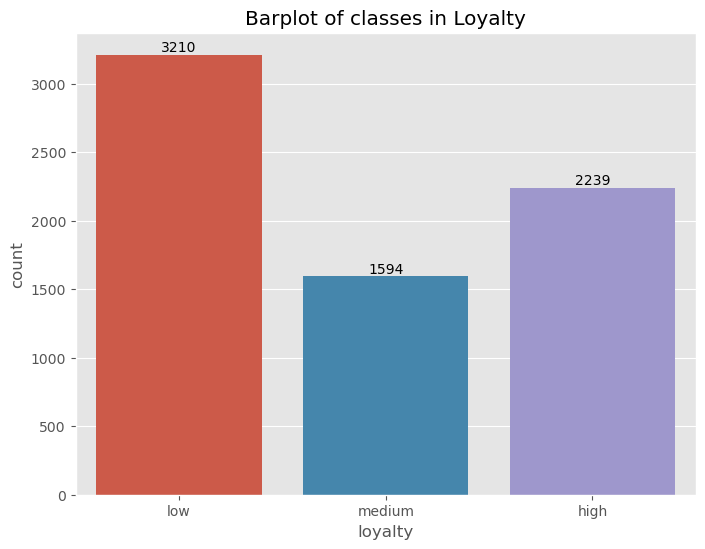

In [191]:
# Plotting loyalty column distribution
barPlotter(df, "loyalty")

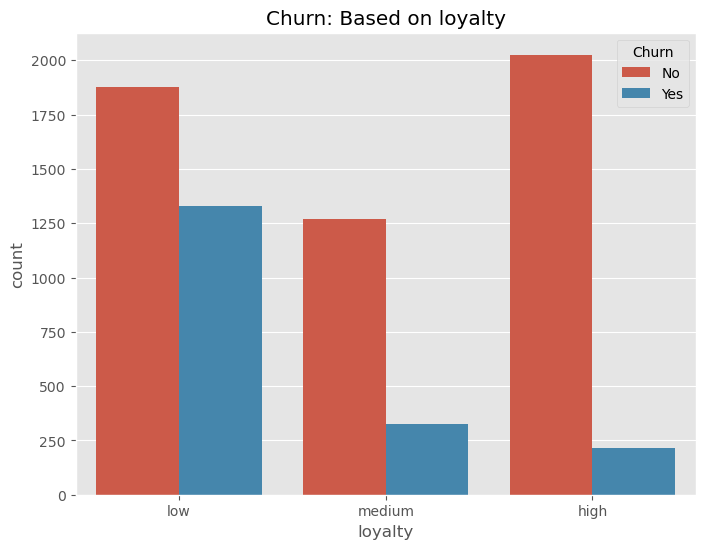

In [192]:
# Plotting churn based on the loyalty class
barPlotter(df, 'loyalty', 'Churn')

It would seem that the customers who have been using Spark's product for a short time are more likely to churn. This is even considering that the majority loyalty class is 'low'.

## What proportion of customers have other teleco company lines?

This information is contained in the MultipleLines column.

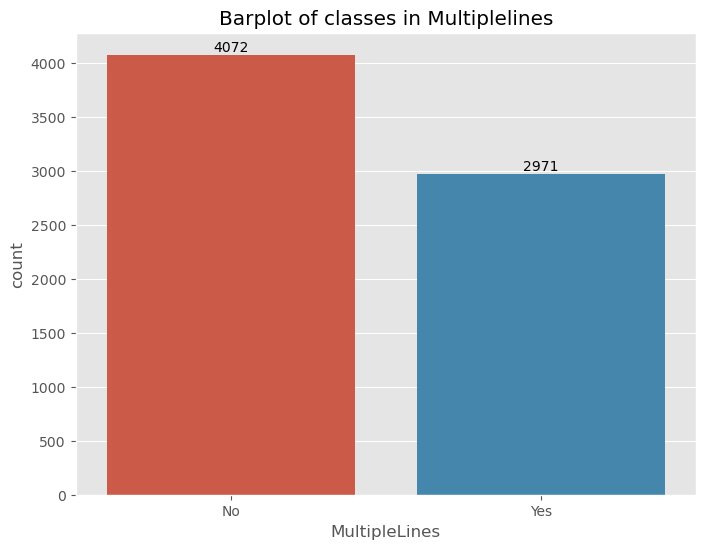

In [193]:
# Plotting bargraph of the multiple lines distibution
barPlotter(df, x_label='MultipleLines')

As expected, quite a huge portion of customers own multiple teleco lines. The question is if owning multiple lines makes a customer more likely to churn. 

## Does owning multiple lines make a customer more likely to churn?

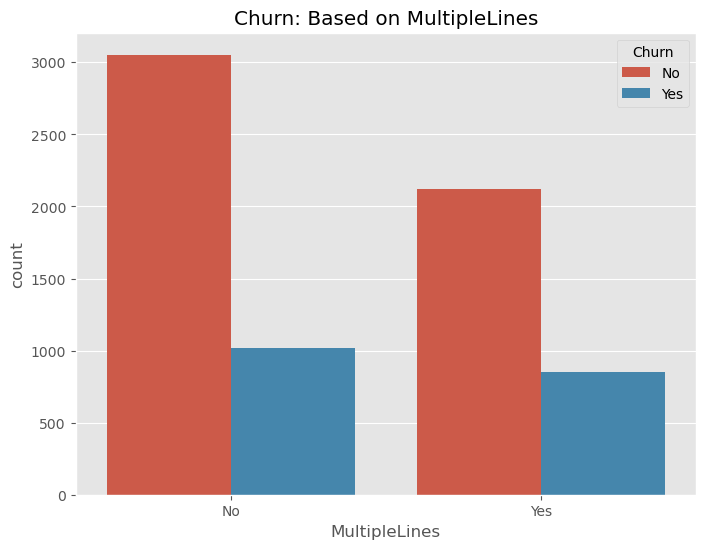

In [194]:
# Creating a plot of churned customers grouped by multiple lines ownership
barPlotter(df, 'MultipleLines', 'Churn')

The visualization above is contrary to the thought that customers owning multiple lines are more likely to leave.

However, checking for the churn class balances in the multiple lines classes should give more detail

In [195]:
# Grouping the variables
multipleLines_vs_churn = df.groupby(by=['MultipleLines', 'Churn']).size().reset_index(name='Count')

# Creating total count column
multipleLines_vs_churn['TotalCounts'] = sorted(multipleLines_vs_churn.groupby('MultipleLines')['Count'].sum().to_list() * 2, reverse=True)

# Calculating and creating percentage count column
multipleLines_vs_churn['PercentageCount'] = multipleLines_vs_churn['Count'] / multipleLines_vs_churn['TotalCounts']
multipleLines_vs_churn.drop(labels=['TotalCounts'], axis=1, inplace=True)
# Viewing the column
multipleLines_vs_churn

,MultipleLines,Churn,Count,PercentageCount
0,No,No,3053,0.749754
1,No,Yes,1019,0.250246
2,Yes,No,2121,0.713901
3,Yes,Yes,850,0.286099


There is no significant difference in the churn of customers owning multiple lines vs those who don't. 

## What is the more popular usage for the teleco lines? Watching movies or TV?

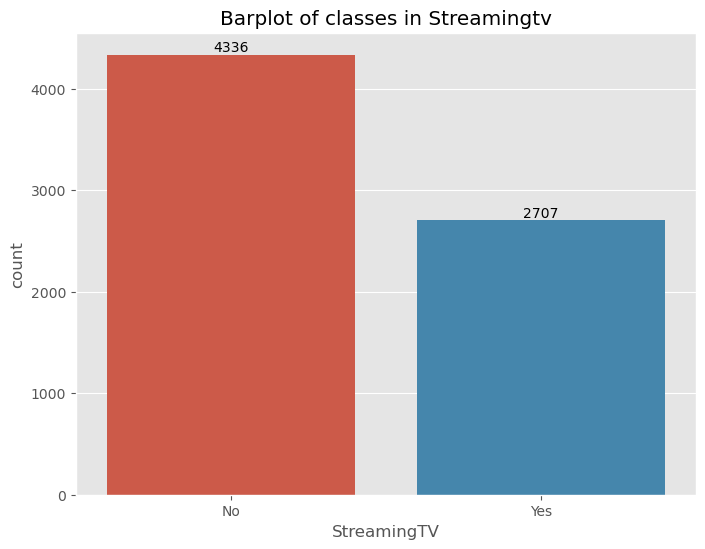

In [196]:
# TV streaming barplot
barPlotter(df, 'StreamingTV')

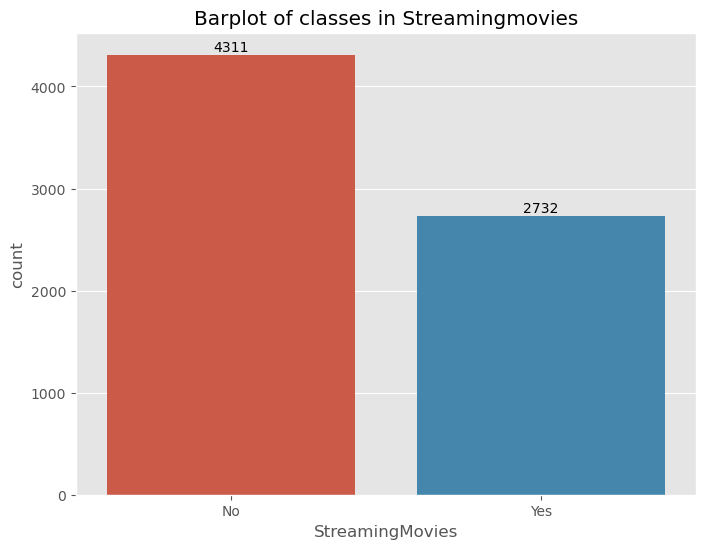

In [197]:
# Streaming movies barplot
barPlotter(df, 'StreamingMovies')

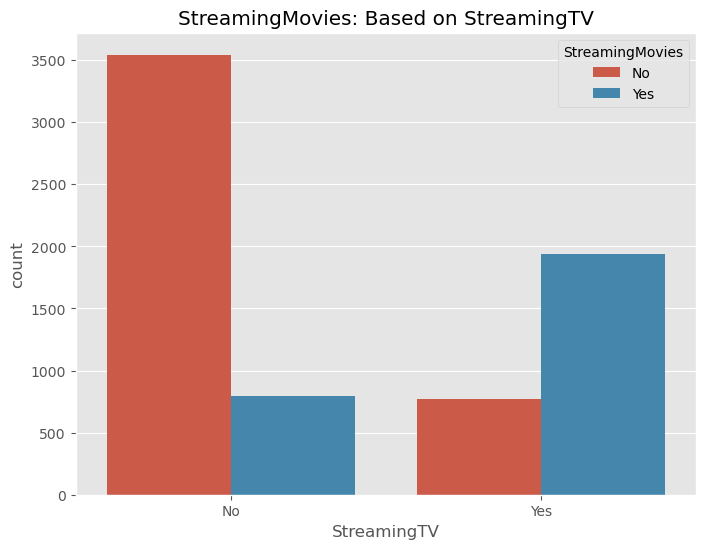

In [198]:
# Streaming TV vs Streaming movies barplot
barPlotter(df, 'StreamingTV', 'StreamingMovies')

Those who do not stream movies are more likely to not stream TV also, and vice versa.

## Does the type of contract of a customer influence their churn possibility?

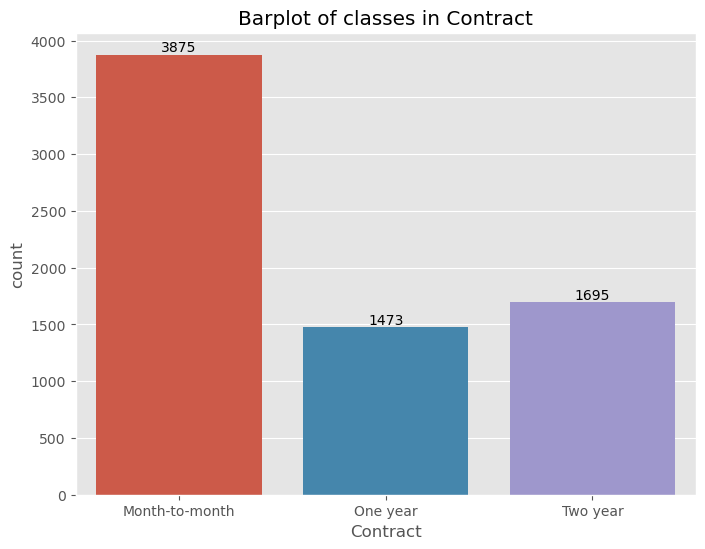

In [199]:
# Barplot of contract type
barPlotter(df, 'Contract')

Majority of the customers subscribe to a month-to-month contract with Sprint.

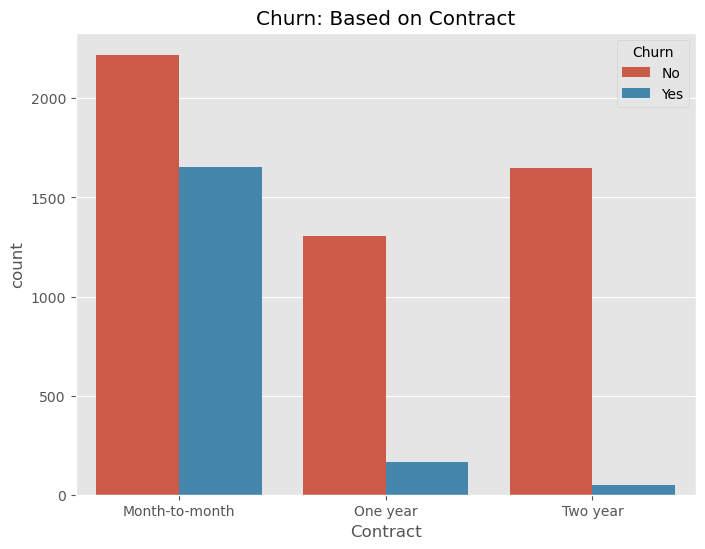

In [200]:
# Plotting churn based on the contract type of a customer
barPlotter(df, 'Contract', 'Churn')

From the plot above, the contract type does influence churn. Customers who take longer term contracts are less likely to churn as seen from the two-year contracts.

## Does tech support influence the churn possibility of a customer?

This is an important aspect to consider as the ideal result of customers receiving technical support should be a greater satisfaction with the company hence a lesser chance of churning.

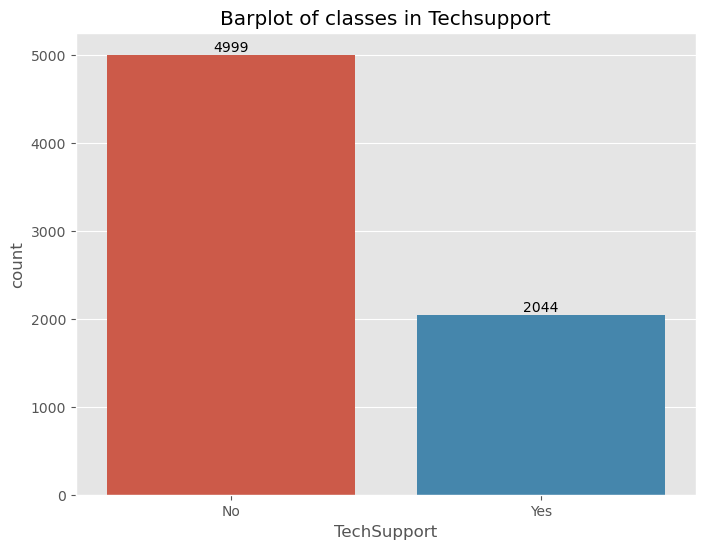

In [201]:
# Barplot of Technical support
barPlotter(df, 'TechSupport')

Approximately 70% of Sprint's customers do not receive Tech support.

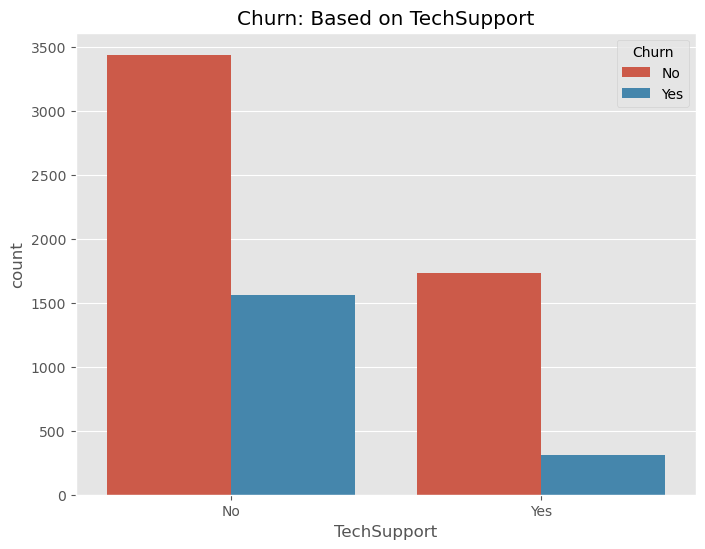

In [202]:
# Plot of churn based on Tech support
barPlotter(df, 'TechSupport', 'Churn')

Indeed, customers receiving tech support are less likely to churn as compared to those who do not.

## Does the method of payment have an effect on the possibility of a customer churning? And is there a difference in spending for customers using different payment methods?

The PaymentMethod and PaperlessBilling columns basically describe the same aspect of a customer, which is the method of payment that they use.

In [203]:
# Checking the difference in spending between the classes
df.groupby(by=['PaperlessBilling', 'PaymentMethod'])['MonthlyCharges'].mean()

PaperlessBilling  PaymentMethod            
No                Bank transfer (automatic)    55.771286
                  Credit card (automatic)      55.158906
                  Electronic check             67.130177
                  Mailed check                 37.428190
Yes               Bank transfer (automatic)    75.563187
                  Credit card (automatic)      74.750737
                  Electronic check             79.519460
                  Mailed check                 53.373399
Name: MonthlyCharges, dtype: float64

Customers who use paperless billing spend much more monthly than their counterparts. This can be explained by the ease and convinience of paperless billing that would make them more likely to spend. 

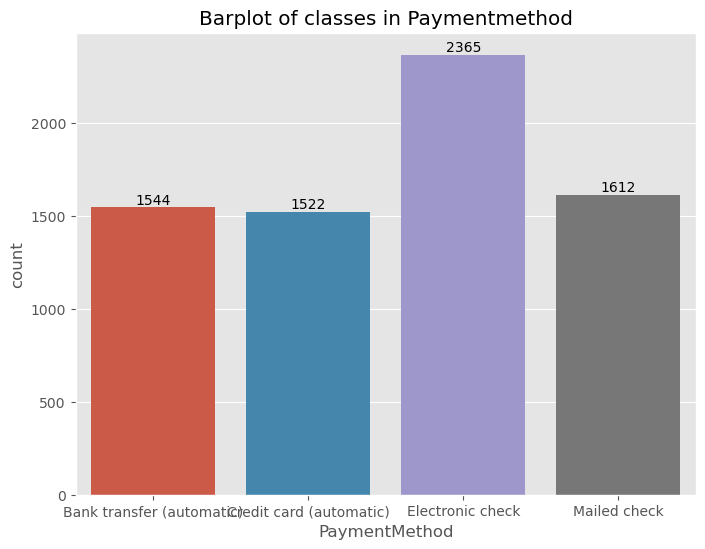

In [204]:
# Barplot of Payment method to check the distribution
barPlotter(df, 'PaymentMethod')

Electronic cheque is the most popular payment method. Next, Let's see if there is any effect of payment method on churn.

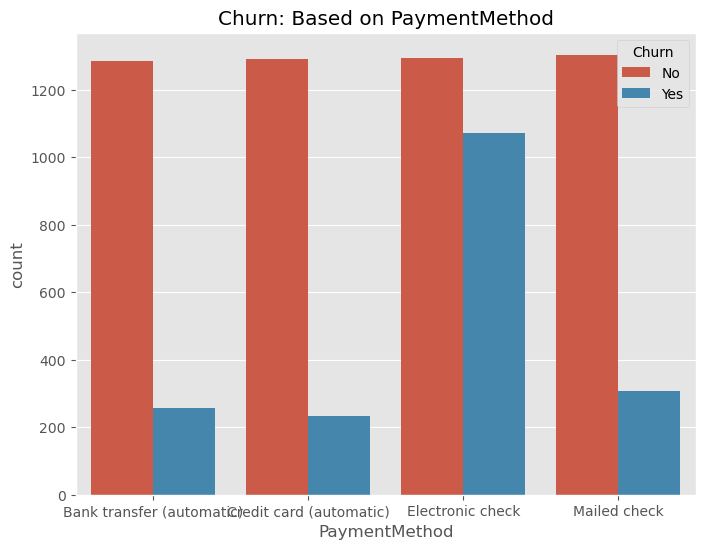

In [205]:
# Barplot of churn based on the payment method
barPlotter(df, 'PaymentMethod', 'Churn')

It would seem that those customers who use electronic cheques for payments are very likely to churn with an almost 40% chance of churning. 

## Does the kind of internet service a customer uses influence their churn possibility?

Considering how internet is an important aspect of a teleco companys selling points, there is a high chance that it affects their customers. Looking at it could help shed some information.

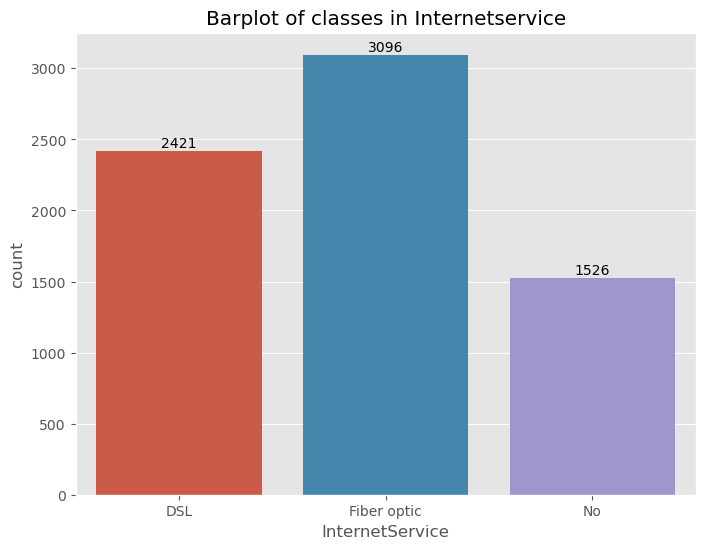

In [206]:
# Checking the internet service distribution
barPlotter(df, 'InternetService')

Approximately 45% of customers use Fiber optic internet connection option and 35% use DSL option. 

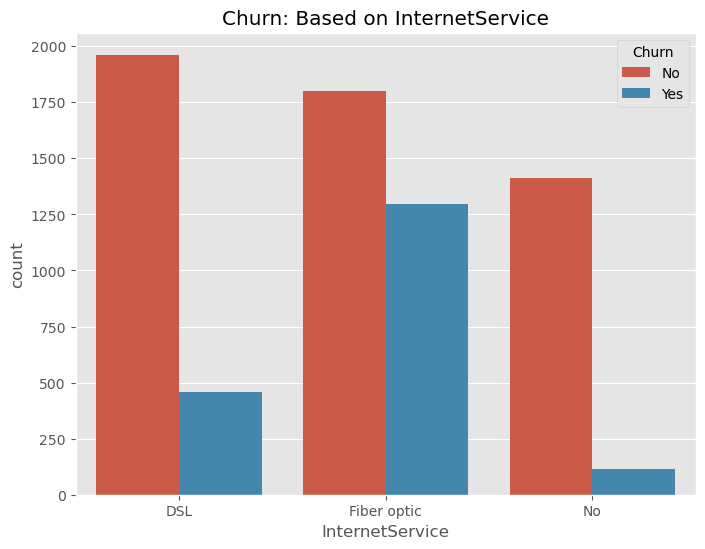

In [207]:
# Plot of churn based on the internet service used 
barPlotter(df, 'InternetService', 'Churn')

A high number of customers who use Fiber optic internet connection end up leaving. This could be due to a problem with Sprint's Fiber optic internet which should be checked out. 

## What is the correlation relationship among the numeric variables?


In [208]:
# Calculating the correlations
corr_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

corr_df

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


There is a high correlation between tenure and total charges which is to be expected as the longer a customer has been with Sprint, the more money they should have used. Also to consider, the approximate tenure time can be calculated from dividing the total charges by the monthly charges which could also be the reason between the correlation between total and monthly charges.

I will drop the TotalCharges feature since it is has high correlation with other features.

In [209]:
# Dropping TotalCharges
df.drop(columns='TotalCharges', inplace=True)

**Conclusions:**

- There is a gender balance in the customers. 
- Only a few of the customers are senior citizens.
- Quite a number of customers have multiple telecom lines
- Most of the customers have subscribes to phone services
- The most popular contact type is month-to-month
- Most customers do not receive tech support
- Most customers don't have subsciption to online security
- Total charges has a right skew distribution which is as to be expected due to the nature of the variable
- Tenure and Monthly-charges have non-normal distributions with monthly charges looking similar to a bimodal distribution.
- There is ~25% churn rate in the company.

# Feature engineering

## Creating Family column

This will be a combination of the Partner and Dependents column. Combining them will allow me to drop them.

The class definitions are as follows:

1. Single - No partner and no dependents
2. Married - Has partner but no dependents
3. Married with kids - Has partner and dependents
4. Divorced, Widowed or Single parent - No partner with dependents

In [210]:
# # Creating the family column
# df['family'] = ''

# # Defining the classes
# df.loc[(df['Partner'] == 'No') & (df['Dependents'] == 'No'), 'family'] = 'Single'
# df.loc[(df['Partner'] == 'Yes') & (df['Dependents'] == 'No'), 'family'] = 'Married'
# df.loc[(df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes'), 'family'] = 'Married with kids'
# df.loc[(df['Partner'] == 'No') & (df['Dependents'] == 'Yes'), 'family'] = 'Divorced, Widowed or Single parent'

# # Dropping the partner and dependents column
# df.drop(labels=['Partner', 'Dependents'], axis=1, inplace=True)

In [211]:
def scatterplot(dataframe):
    """
    Takes in a dataframe and sorts out the numrical column.
    Creates scatterplots of the numerical data
    """
    columns = dataframe.select_dtypes(include=['int', 'float']).columns.tolist()
    perm = list(permutations(columns, 2))
    perm = [x for x in perm if x[0] != x[1]]
    len_perm = len(perm)

    # Setting up plots
    nrows, ncols = (len_perm/3).__ceil__(), 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 10))

    for i, cols in enumerate(perm):
        a, b = i // 3, i % 3
        sns.scatterplot(data=dataframe, x=cols[0], y=cols[1], ax=ax[a, b])

    plt.tight_layout()
    plt.show()
    

# Data Preprocessing

## Train Test Splitting

In [212]:
# Separating data into target and predictor variables
predictor_df = df.drop(columns=['Churn', 'customerID'])  # Customer ID beacause it is no longer neccessary
target_var = df['Churn']

# Train test splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(predictor_df, target_var, test_size=0.25, random_state=42, stratify=target_var)  # Using stratify to ensure same proportions of the target variable in the split

# Asserting that the dataframe shapes are okay
assert X_train.shape[1] == X_test.shape[1]  # Ensuring same number of features
assert X_train.shape[0] == Y_train.shape[0] # Ensuring the same number of records in train data
assert X_test.shape[0] == Y_test.shape[0]  # Ensuring the same number of records in test data

In [213]:
# Checking the data
print(Y_train.head())

X_train.head()

6661     No
4811    Yes
2193     No
1904    Yes
6667    Yes
Name: Churn, dtype: category
Categories (2, object): ['No', 'Yes']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,loyalty
6661,Female,No,Yes,Yes,72,No,No,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,high
4811,Female,No,No,No,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,low
2193,Male,No,No,Yes,56,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,21.20,high
1904,Male,No,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,high
6667,Female,No,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,low


Now that the data is split, I can proceed to preprocessing steps for the data before building the models.


## Categorical Data encoding

For the columns having 2 categories, I will use the label encoder while for those having more than 2 categories, I will apply one-hot encoding. 

In [214]:
# Subsetting categorical columns
trainBinary_category_df = X_train.select_dtypes(include=['category']).drop(columns=['InternetService', 'Contract', 'PaymentMethod', 'loyalty'])  # Removing columns with more than 2 categories and the target feature
trainMulti_category_df = X_train.select_dtypes(include='category')[['InternetService', 'Contract', 'PaymentMethod', 'loyalty']]  # Selecting the multi-category columns
testBinary_category_df = X_test.select_dtypes(include=['category']).drop(columns=['InternetService', 'Contract', 'PaymentMethod', 'loyalty'])
testMulti_category_df = X_test.select_dtypes(include='category')[['InternetService', 'Contract', 'PaymentMethod', 'loyalty']]

In [215]:
def label_encoder(dataframe, encoder=dict):
    """
    
    """
    results_dataframe = pd.DataFrame(index=dataframe.index)

    for col in dataframe.columns:
        instantiated_encoder = encoder[col]
        # Transforming the data
        transformed = instantiated_encoder.transform(dataframe[col])
        # Setting the transformed column to a new column in the results dataframe
        results_dataframe[col] = transformed

    return results_dataframe

In [216]:
# Instantiating the label encoder
# Since label encoder does not allow for multiple column encoding, I will have to improvise a method using dictionaries to have instantiated objects for each column
le_dictionary = {column: LabelEncoder().fit(trainBinary_category_df[column]) for column in trainBinary_category_df.columns}

# Transforming the train data and setting it to a new dataframe
trainBinary_encoded = label_encoder(trainBinary_category_df, le_dictionary)

In [217]:
def oneHot_encoder(dataframe, encoder=dict):
    """
    
    """
    results_dataframe = pd.DataFrame(index=dataframe.index)

    for column in dataframe.columns:
        instantiated_encoder = encoder[column]
        # Transfroming the column
        transformed = instantiated_encoder.transform(dataframe[[column]])
        transformed_df = pd.DataFrame(data=transformed, columns=[f"{column}_{category}" for category in instantiated_encoder.categories_[0][1:]], index=dataframe.index)
        # Concatenating the transformed column to the results dataframe
        results_dataframe = results_dataframe.join(transformed_df)

    return results_dataframe

In [218]:
# Same as the Label encoder I will use a dictionary to store the class instantiations for OneHot encoder
oh_dictionary = {column: OneHotEncoder(categories='auto', drop='first', sparse_output=False).fit(trainMulti_category_df[[column]]) for column in trainMulti_category_df.columns}

# Transforming the train data and setting it no a new variable name
trainMulti_encoded = oneHot_encoder(trainMulti_category_df, oh_dictionary)

In [219]:
# Next is transforming Test data
testBinary_encoded = label_encoder(testBinary_category_df, le_dictionary)  # Label encoding
testMulti_encoded = oneHot_encoder(testMulti_category_df, oh_dictionary)  # One-hot encoding


## Numerical Data

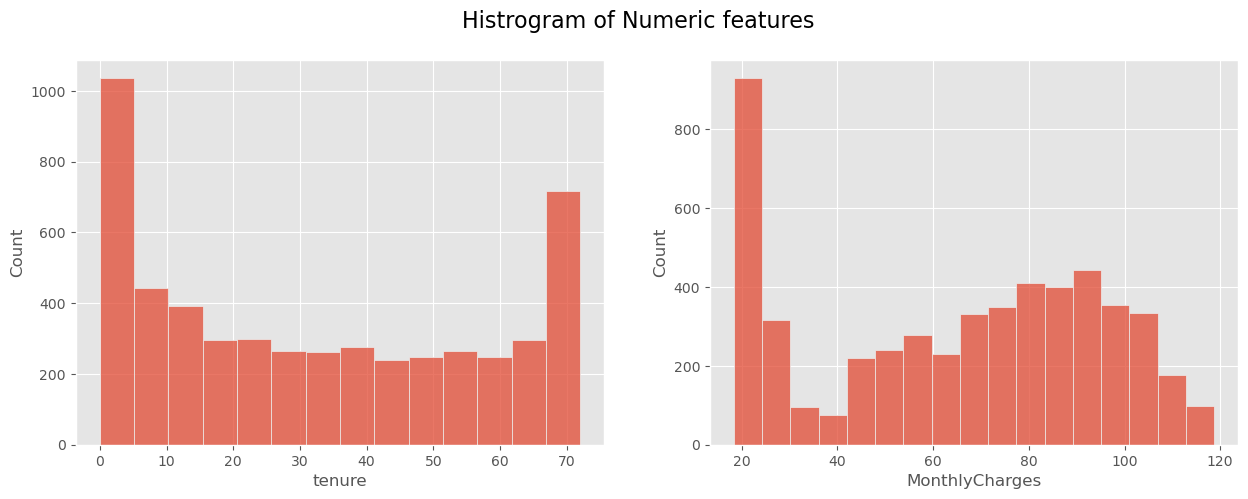

In [220]:
# Subsetting the numeric features
trainNumeric_df = X_train.select_dtypes(include=['int', 'float'])
testNumeric_df = X_test.select_dtypes(include=['int', 'float'])

# Checking the distributions in numerical features
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

sns.histplot(data=trainNumeric_df['tenure'], ax=ax[0])
sns.histplot(data=trainNumeric_df['MonthlyCharges'], ax=ax[1])
plt.suptitle("Histrogram of Numeric features", fontsize=16)
plt.show()

Standardization is not a good option for this kind of data considering that it doesn't have normal or near-normal distributions. Therefore, I will use normalization, specifically min-max scaling for the variables.

In [221]:
# Instantiating the MinMaxScaler
mm_scaler = MinMaxScaler()

# Fitting it to train data and transforming
trainNumeric_scaled = mm_scaler.fit_transform(trainNumeric_df)
trainNumeric_scaled = pd.DataFrame(trainNumeric_scaled, columns=trainNumeric_df.columns, index=trainNumeric_df.index)
# transforming test data
testNumeric_scaled = mm_scaler.transform(testNumeric_df)
testNumeric_scaled = pd.DataFrame(testNumeric_scaled, columns=testNumeric_df.columns, index=testNumeric_df.index)

I will rejoin all the preprocessed data in preparation for modelling

In [222]:
# Rejoining all X data, both train and test
X_train_processed = trainBinary_encoded.join(trainMulti_encoded).join(trainNumeric_scaled)
X_test_processed = testBinary_encoded.join(testMulti_encoded).join(testNumeric_scaled)

## Target Feature

In [224]:
# Preprocessing the target feature with label encoder since it is a binary category feature
le_target = LabelEncoder()

# fitting and transforming train data
Y_train_encoded = pd.Series(data=le_target.fit_transform(Y_train), index=Y_train.index)
Y_test_encoded = pd.Series(data=le_target.transform(Y_test), index=Y_test.index)

## Checking the correlations among variables after preprocessing

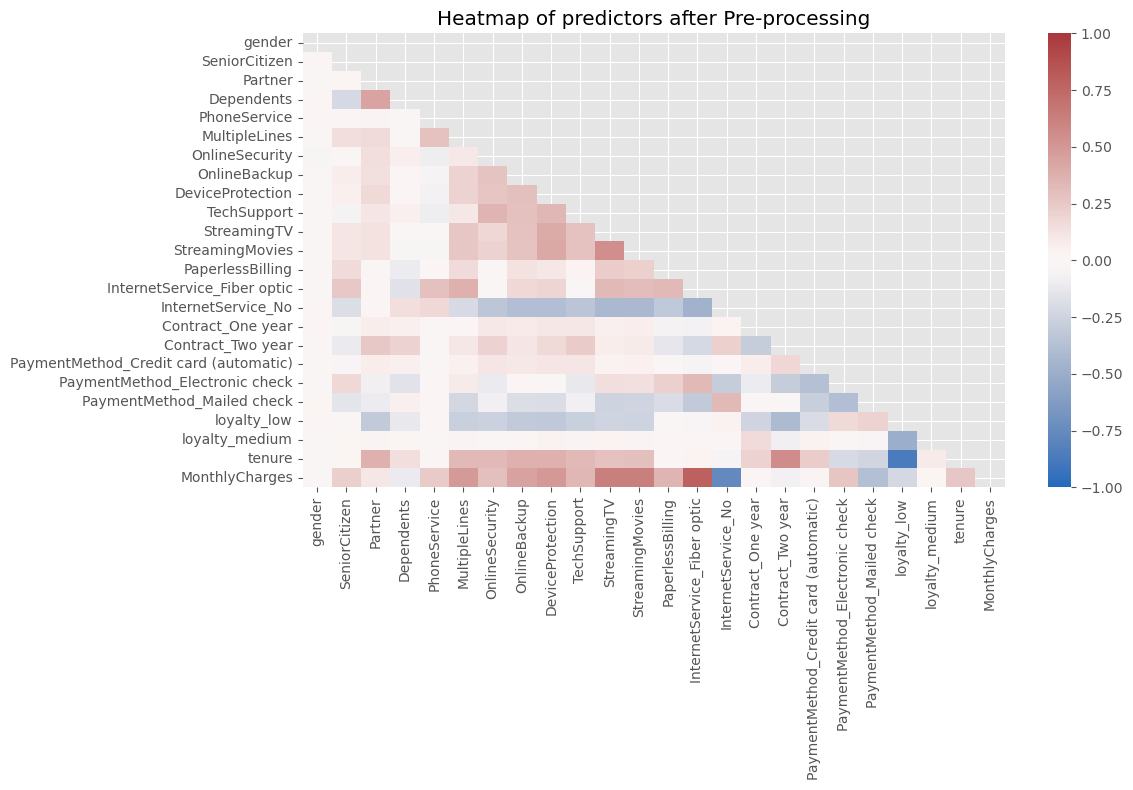

In [225]:
# Calculating the correlations
processed_corr = X_train_processed.corr()
mask = np.triu(np.ones_like(processed_corr, dtype=bool))

# Plotting a heatmap for easy interpretation
plt.figure(figsize=(12, 8))
sns.heatmap(data=processed_corr, cmap='vlag', mask=mask, vmin=-1, vmax=1)
plt.title("Heatmap of predictors after Pre-processing")
plt.tight_layout()

The data is fine for modelling, with a low number of high correlations.

# Machine Learning Models

I will use a number of machine learning models and choose the best performing one. Considering that this is a binary classification task the models applicable include:

1. Linear regression (Baseline Model)
2. Logistic regression
3. Naive Bayes
4. Decision Tree
5. Support Vector Machine(SVM)
6. K-nearest-neighbors (KNN)

I am going to use the all listed models with default parameters (with regard to this problem) then I will chose the best performing 'default' model and hypertune it. Then again I may decide to use boosting methods.

## Baseline model

In [242]:
# Instantiating linear regression model
baseline = LinearRegression()

# Creating shuffle splits for cross validations
# I will use 3 esentially meaning that I m performing 3 different train-test splits in the data
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

# Cross validating
baseline_CV = cross_validate(estimator=baseline,
                              X=X_train_processed,
                              y=Y_train_encoded,
                              scoring="r2",
                              return_train_score=True,
                              cv=splitter
                              )

# Print scores
print(f"Train Score: {baseline_CV['train_score'].mean()}, Test Score: {baseline_CV['test_score'].mean()}")

Train Score: 0.28705744104353464, Test Score: 0.2753092298983936


In the baseline mode, only ~28% of the variation in the target for train data is explained by the model while ~27% for the test data.

## Logistic regression

In [244]:
# Instantiating logistic regressor
logistic_1 = LogisticRegression(random_state=42)

# Cross validating
logistic_1_CV = cross_validate(estimator=logistic_1,
                               X=X_train_processed,
                               y=Y_train_encoded,
                               scoring='neg_log_loss',  # roc_auc, neg_log_loss, recall, precision, f1
                               return_train_score=True,
                               cv=splitter)

# Print scores
print(f"Train Score: {-logistic_1_CV['train_score'].mean()}, Test Score: {-logistic_1_CV['test_score'].mean()}")

Train Score: -0.4108310171092093, Test Score: -0.4240398725876817


## Naive Bayes

I will test out both Gaussian and Categorical naive bayes algorithms to differenciate between their performance.

In [250]:
gaussianBayes = GaussianNB()

gaussianBayes_CV = cross_validate(estimator=gaussianBayes,
                                  X=X_train_processed,
                                  y=Y_train_encoded, 
                                  scoring='neg_log_loss',
                                  return_train_score=True,
                                  cv=splitter)

# Print scores
print(f"Train Score: {-gaussianBayes_CV['train_score'].mean()}, Test Score: {-gaussianBayes_CV['test_score'].mean()}")

Train Score: -1.1078448484895402, Test Score: -1.169295637997017


The Gaussian Naive Bayes model performs very badly as compared to the logistic regression model. Let me proceed to check the performance of the categorical naive bayes model.

In [281]:
# Instantiating the categorical encoder
categoricalBayes = CategoricalNB(min_categories=2)

# Performing cross validation
categoricalBayes_CV = cross_validate(estimator=categoricalBayes,
                                  X=X_train_processed,
                                  y=Y_train_encoded, 
                                  scoring='neg_log_loss',
                                  return_train_score=True,
                                  cv=splitter)

# Print scores
print(f"Train Score: {-categoricalBayes_CV['train_score'].mean()}, Test Score: {-categoricalBayes_CV['test_score'].mean()}")

Train Score: 0.5448723176444302, Test Score: 0.5602906812720948


The categorical Naive Bayes model performs better than the Gaussian model, however, it is still underperforming when compared to the Logistic regression model.

## Decision Tree Classifier

In [278]:

decisiontree_1 = DecisionTreeClassifier(criterion='log_loss')

decisiontree_1_CV = cross_validate(estimator=decisiontree_1,
                                  X=X_train_processed,
                                  y=Y_train_encoded, 
                                  scoring='neg_log_loss',
                                  return_train_score=True,
                                  cv=splitter)

# Print scores
print(f"Train Score: {-decisiontree_1_CV['train_score'].mean()}, Test Score: {-decisiontree_1_CV['test_score'].mean()}")

Train Score: 0.0025820016843233168, Test Score: 9.842687333822473


The decision tree classifier overfits the train data. This could be due to the depth, min_sample_leaf and min_sample_split

## Support Vector Machine (SVM)

In [296]:
supportvector_1 = SVC(probability=True, cache_size=1000, random_state=42)

# fitting to train data
supportvector_1.fit(X=X_train_processed, y=Y_train_encoded)

svm_1_trainpreds = supportvector_1.predict_proba(X=X_train_processed)
svm_1_trainlog_loss = log_loss(y_true=Y_train_encoded, y_pred=svm_1_trainpreds)
svm_1_testpreds = supportvector_1.predict_proba(X_test_processed)
svm_1_testlog_loss = log_loss(Y_test_encoded, svm_1_testpreds)
# Print scores
print(svm_1_trainlog_loss, svm_1_testlog_loss)

0.41594534326249705 0.46228001367202143


## K-Nearest-Neaighbors (KNN)

In [325]:
knn_1 = KNeighborsClassifier(n_neighbors=1)

# fitting to train data
knn_1.fit(X=X_train_processed.values, y=Y_train_encoded)

knn_1_trainpreds = knn_1.predict_proba(X=X_train_processed.values)
# knn_1_trainlog_loss = log_loss(y_true=Y_train_encoded, y_pred=knn_1_trainpreds)
knn_1_testpreds = knn_1.predict_proba(X_train_processed.values)
knn_1_testlog_loss = log_loss(Y_test_encoded, knn_1_testpreds)
# Print scores
# print(knn_1_trainlog_loss, knn_1_testlog_loss)

ValueError: Found input variables with inconsistent numbers of samples: [5282, 1761]

In [327]:
knn_1.outputs_2d_

False

In [324]:
knn_1_trainpreds

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [326]:
knn_1_testpreds

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Hyperparameter Tuning

In [159]:
# I am going to loop through possible values of depth to find what depth value minimizes log loss
depthLog_loss = []

for number in range(1, 21):
    # initialize, fit and predict using the model
    depthModel = DecisionTreeClassifier(max_depth=number, random_state=42)
    depthModel.fit(x_train, y_train_enc)
    depth_probs = depthModel.predict_proba(x_test)
    
    # perform cross validation
    depth_logLoss_train = -(cross_val_score(depthModel, x_train, y_train_enc, scoring='neg_log_loss').mean())
    depth_logLoss_test = log_loss(y_test_enc, depth_probs)
    
    depthlog_losses = (depth_logLoss_train, depth_logLoss_test)
    depthLog_loss.append(depthlog_losses)
    
depthLog_loss[:10]

[(0.48755419359106666, 0.4857439408702036),
 (0.4652243058093665, 0.46632833719638234),
 (0.44276398034907194, 0.44229690378454845),
 (0.4544913299918118, 0.42554636882714675),
 (0.5307573782151304, 0.504109746129326),
 (0.6777310595933294, 0.6015567548915036),
 (1.0644444683851608, 0.7435977453134343),
 (1.558149785969406, 1.2166875330165963),
 (2.4544931438972752, 1.9337735006230434),
 (3.363468563830748, 3.088234484169493)]

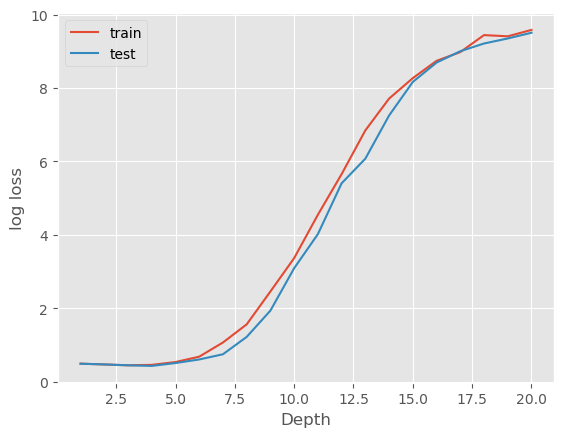

In [160]:
# plot the graph of the log losses
# train log_loss
plt.plot(range(1, 21), np.array(depthLog_loss)[:, 0], label='train')

# test log_loss
plt.plot(range(1, 21), np.array(depthLog_loss)[:, 1], label='test')

# Plot aesthetic
plt.xlabel('Depth')
plt.ylabel('log loss')
plt.legend()
plt.show()

**Conclusion:**

At max depth 3, we have the least logloss on the test data. That is the max depth I am going to use.

In [161]:
# Next I am going to investigate the effect of different values of min_samples_split on log loss
splitLog_loss = []

for number in range(2, 31):
    # initialize, fit and predict using the model
    splitModel = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=number)
    splitModel.fit(x_train, y_train_enc)
    split_probs = splitModel.predict_proba(x_test)
    
    # perform cross validation
    split_logLoss_train = -(cross_val_score(splitModel, x_train, y_train_enc, scoring='neg_log_loss').mean())
    split_logLoss_test = log_loss(y_test_enc, split_probs)
    
    splitlog_losses = (split_logLoss_train, split_logLoss_test)
    splitLog_loss.append(splitlog_losses)
    
splitLog_loss[:10]

[(0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845)]

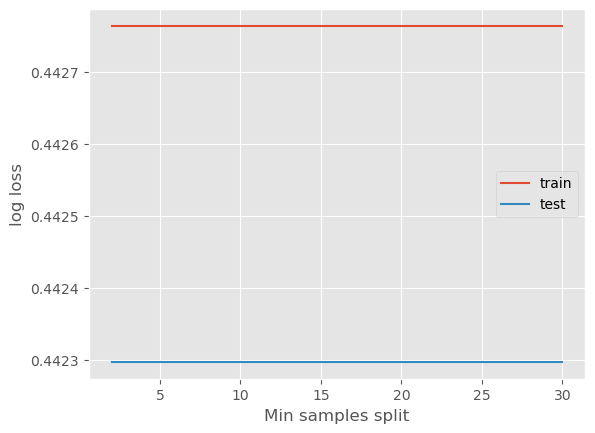

In [162]:
# plot the graph of the above logloss values
# train log_loss
plt.plot(range(2, 31), np.array(splitLog_loss)[:, 0], label='train')

# test log_loss
plt.plot(range(2, 31), np.array(splitLog_loss)[:, 1], label='test')

plt.xlabel('Min samples split')
plt.ylabel('log loss')
plt.legend()
plt.show()

In [163]:
# # Instantiate a LogisticRegression with random_state=42
# baseline_model = LogisticRegression(random_state=42)

# # Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# # on X_train and y_train
# baseline_neg_log_loss_cv = cross_val_score(baseline_model, x_train, y_train_enc, scoring='neg_log_loss')

# baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
# baseline_log_loss

**Conclusion:**

Changing the min_samples_split hyperparameter yields no effect on the model's logloss. 

Since little could be done in hyperparameter tuning. I will resample the data to mitigate the class imbalance in the data to see whether there will be better model performance. 

### Resampling data

Resampling the data using SMOTE to test whether the model performance will improve.


In [164]:
# Instantiate a SMOTE object
sm = SMOTE(random_state = 42)

# Fitting and resampling the data
x_train_res, y_train_res = sm.fit_resample(x_train, y_train_enc.ravel())

In [165]:
# Instantiate the resampled data model
resdata_treeModel = DecisionTreeClassifier(random_state=42)

# Fit the model
resdata_treeModel.fit(x_train_res, y_train_res)

# perform cross validation with resampled train data
resdata_treeModel_logloss = -(cross_val_score(resdata_treeModel, x_train_res, y_train_res, scoring='neg_log_loss').mean())
probs_restree = resdata_treeModel.predict_proba(x_test)

# compare model scores on test data and resampled train data
print('train:' + str(resdata_treeModel_logloss) + ', test:' + str(log_loss(y_test_enc, probs_restree)))

train:8.245571215568669, test:10.13230818965026


In [166]:
# I am going to loop through possible values of depth to find out the difference from the baseline model iterations
resDepthLog_loss = []

for number in range(1, 21):
    # initialize, fit and predict using the model
    resDepthModel = DecisionTreeClassifier(max_depth=number, random_state=42)
    resDepthModel.fit(x_train_res, y_train_res)
    resDepth_probs = resDepthModel.predict_proba(x_test)
    
    # perform cross validation
    resDepth_logLoss_train = -(cross_val_score(resDepthModel, x_train_res, y_train_res, scoring='neg_log_loss').mean())
    resDepth_logLoss_test = log_loss(y_test_enc, resDepth_probs)
    
    resDepthlog_losses = (resDepth_logLoss_train, resDepth_logLoss_test)
    resDepthLog_loss.append(resDepthlog_losses)
    
resDepthLog_loss[:10]

[(0.5533861747323658, 0.5706382123811709),
 (0.5240365102669824, 0.5458692890542494),
 (0.4948814483039615, 0.5138745486623096),
 (0.4773832569456081, 0.5022964015618508),
 (0.5095552662701364, 0.540594888866892),
 (0.599782592011839, 0.5829704883096102),
 (0.7981977059406028, 0.8138251145005178),
 (1.1867130971871465, 1.229612091819729),
 (1.81211266459368, 2.026534617714948),
 (2.719232067619733, 3.026489533030234)]

Class balancing has not brought any preferred changes to the model. In fact the performance seems to be worse.

Therefore I select the decision tree model with depth parameter as 3 is the final model for the problem.

## Final Model

In [167]:
finalModel = DecisionTreeClassifier(max_depth=3, random_state=42)

finalModel.fit(x_train, y_train_enc)
finalModel_probs = finalModel.predict_proba(x_test)
finalModel_preds = finalModel.predict(x_test)

print("log loss: ", log_loss(y_test_enc, finalModel_probs))
print("accuracy: ", accuracy_score(y_test_enc, finalModel_preds))
print("precision:", precision_score(y_test_enc, finalModel_preds))
print("recall:   ", recall_score(y_test_enc, finalModel_preds))
print("f1_score:   ", f1_score(y_test_enc, finalModel_preds))

log loss:  0.44229690378454845
accuracy:  0.7751277683134583
precision: 0.6682464454976303
recall:    0.3019271948608137
f1_score:    0.41592920353982304


**Model Interpretation**

Accuracy - The final model correctly identifies whether a customer will leave or not ~77% of the time.

Precision - This means that if the model labels a given cell of a customer as a potential churn, there is an ~66% chance that the customer will leave and a ~34% chance that they will not.

Recall - This means that if a customer is actually going to leave, there's a ~30% chance that the model will correctly label them. 

# Conclusions:

The final model's perfomance is way better than random guessing or simply assuming that all or no customers will leave. However, it is not good enough for deployment yet.

# Recommendations:

More study into the data needs to be done. 

Zeroing down on what features are relevant for modelling whether a customer will churn or not.